# Aufgabe 3

### Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 500)

# a)

### Read data

In [3]:
employment = pd.read_excel("dataset/employment_08_09.xlsx")
print(employment.shape)

(5412, 21)


In [4]:
employment.head()

,age,race,earnwke,employed,unemployed,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,53,1,NaN,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,39,1,NaN,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
2,41,1,500.0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,27,1,520.0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
4,29,3,615.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


### Variable overview

The data set contains mainly discrete variables:
    
- The variable `race` is a categorical nominal-scaled variable wich encodes three distinct states.
- The variable `age` is an integer ratio-scaled variable.
- The rest (exept `earnwke`) are binary (=dummy) variables.

The variable `earnwke` is a continuous variable that is ratio-scaled.

1. The target variable is `employed` / `unemployed`. They should be distinct and exhaustive. Check and leave one out for later analysis.

2. The variable `race` encodes three possible states. Transform to dummies and leave one out for later analysis.

3. The variables `ne_states`, `so_states`, `ce_states` and `we_states` should be distinct and exhaustive. Check and leave one out for later analysis.

4. The variables `private`, `government` and `self` should be distinct and exhaustive. Check and leave one out for later analysis.

5. The variables `educ_lths`, `educ_hs`, `educ_somecol`, `educ_aa`, `educ_ba` and `educ_adv` should be distinct and exhaustive. Check and leave one out for later analysis.

6. The variable `earnwke` is probably not available for self-employed people. Check later and handle possible missing values.

### 1. Sanity check target variables

In [5]:
employment[["employed", "unemployed"]].value_counts()

employed  unemployed
1         0             4738
0         0              435
          1              239
dtype: int64

One can see, that there are 435 data points which contain no information about wether or not the person was employed in 2009.

These points will be removed from the data.

In [6]:
unknown_employment_status = (employment["employed"] == employment["unemployed"])
employment = employment[~unknown_employment_status]
employment.head()

,age,race,earnwke,employed,unemployed,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,53,1,NaN,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,39,1,NaN,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
2,41,1,500.0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,27,1,520.0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
4,29,3,615.0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


Now we remove the redundant variable `employed`:

In [7]:
employment.drop(columns="employed", inplace=True)
employment.head()

,age,race,earnwke,unemployed,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female
0,53,1,NaN,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,39,1,NaN,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
2,41,1,500.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
3,27,1,520.0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
4,29,3,615.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


### 2. Dummy transform `race` column

In [8]:
employment = pd.get_dummies(employment, columns=["race"], drop_first=True)
employment.head()

,age,earnwke,unemployed,married,union,ne_states,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female,race_2,race_3
0,53,NaN,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,39,NaN,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
2,41,500.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,27,520.0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,29,615.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1


### 3. Remove redundancy in terms of employment states

Check if every worker contains one and only one employment state:

In [9]:
employment[["ne_states", "so_states", "ce_states", "we_states"]].sum(axis=1).value_counts()

1    4977
dtype: int64

Drop first state indicator to remove redundancy:

In [10]:
employment.drop(columns="ne_states", inplace=True)
employment.head()

,age,earnwke,unemployed,married,union,so_states,ce_states,we_states,government,private,self,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female,race_2,race_3
0,53,NaN,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,39,NaN,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
2,41,500.0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,27,520.0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,29,615.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1


### 4. Remove redundancy in type of employment

Check if every worker contains one and only one employment type:

In [11]:
employment[["government", "private", "self"]].sum(axis=1).value_counts()

1    4977
dtype: int64

Drop `self` employement indicator to remove redundancy and to reduce maximal amout of correlation between variables (we know when union=1 => self=0):

In [12]:
employment.drop(columns="self", inplace=True)
employment.head()

,age,earnwke,unemployed,married,union,so_states,ce_states,we_states,government,private,educ_lths,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female,race_2,race_3
0,53,NaN,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,39,NaN,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
2,41,500.0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
3,27,520.0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
4,29,615.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1


### 5. Remove redundancy in worker education

Check if every worker contains one and only one type of highest education level:

In [13]:
employment[["educ_lths", "educ_hs", "educ_somecol", "educ_aa", "educ_bac", "educ_adv"]].sum(axis=1).value_counts()

1    4977
dtype: int64

Drop first education level to remove redundancy:

In [14]:
employment.drop(columns="educ_lths", inplace=True)
employment.head()

,age,earnwke,unemployed,married,union,so_states,ce_states,we_states,government,private,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female,race_2,race_3
0,53,NaN,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,39,NaN,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,41,500.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0
3,27,520.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,29,615.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1


### 6. Drop `earnwke` variable due to missing values for self-employed workers

In [15]:
employment.drop(columns="earnwke", inplace=True)
employment.head()

,age,unemployed,married,union,so_states,ce_states,we_states,government,private,educ_hs,educ_somecol,educ_aa,educ_bac,educ_adv,female,race_2,race_3
0,53,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,39,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,41,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0
3,27,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,29,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1


### Check distribution of target variable

In [16]:
target_group = employment["unemployed"].value_counts()
print("Amount of unemployment vs. employment in data: {n_unemployed} vs. {n_employed}".format(n_employed=target_group[0], n_unemployed=target_group[1]))

Amount of unemployment vs. employment in data: 239 vs. 4738


One can see that unemployment is pretty undersampled in the training data. One could oversample it by bootstrapping or undersample employment by leaving out random data points.

### Define input and target variables

In [49]:
X = employment.drop(columns="unemployed")
y = employment["unemployed"]

### Get train/test split

In [51]:
input_train, input_test, label_train, label_test = train_test_split(X, y, train_size=0.8, shuffle=True, stratify=y)

### Possible methods

We want to predict who is going to be unemployed in the future. The target variable is discrete (more specifically binary) and that's why we are looking at a classification task with two classes.

Possible classification algorithms are:
- k-Nearest-Neighbour
- Decision Tree
- Logistic Regression
- Support Vector Machine

Choosing Logistic Regression, because it is very interesting to compare the L2 loss against the cross entropy loss in terms of classification.

### Baseline: Most often class

In [52]:
most_often_class = label_train.mode()[0]
print(f"The class that appears most often in the training data is: class {most_often_class} (= employed)")

The class that appears most often in the training data is: class 0 (= employed)


In [53]:
model = lambda x: most_often_class
y_hat = label_test.apply(model)
print(f"The accuracy of this model is: {accuracy_score(label_test, y_hat):.2%}")

The accuracy of this model is: 95.18%


### Baseline: Linear Regression

In [54]:
model = linear_model.LinearRegression()
model.fit(input_train, label_train)

LinearRegression()

accuracy: 95.18%


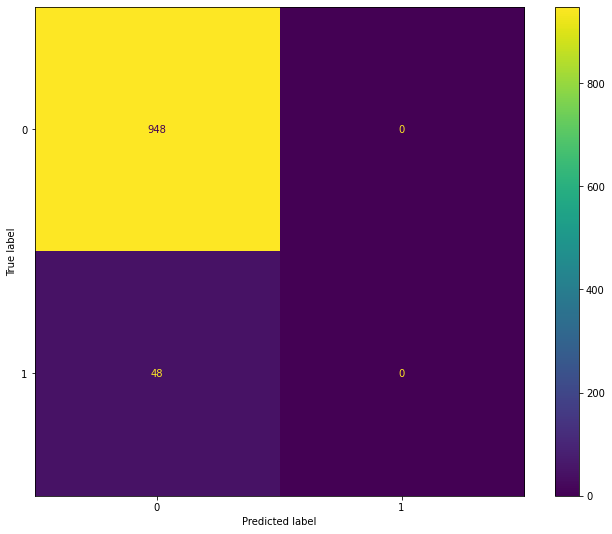

In [55]:
plt.rcParams["figure.figsize"] = (11, 9)

y_hat = model.predict(input_test)

print(f"accuracy: {accuracy_score(label_test, y_hat.round()):.2%}")

cm = confusion_matrix(label_test, y_hat.round())
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

### Logistic Regression

In [56]:
model = linear_model.LogisticRegression(solver="liblinear").fit(input_train, label_train)

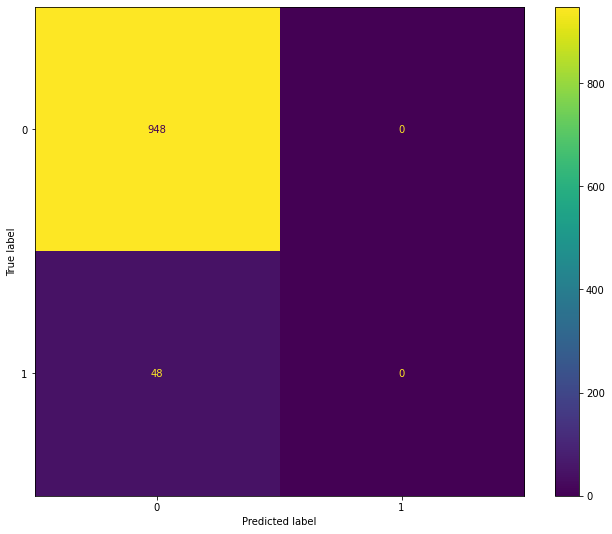

The mean accuracy is: 95.18%


In [58]:
cm = confusion_matrix(label_test, y_hat.round())
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print(f"The mean accuracy is: {model.score(input_test, label_test):.2%}")

### Comparison

All methods reached the same accuracy score. This is the case, because every sample in the test set was classified as `employed`. It is possible that this happened, because the class `unemployed` is undersampled in the data.

### Were older employeed more probable to be unemployed after the financial crisis in 2008/2009?

In [27]:
fig = px.histogram(employment, x="age", y="unemployed", nbins=5)
fig.show()

It seems that for this data, the age played no role in somebody losing his job in 2009.

# b)

### Read data

In [ ]:
growth = pd.read_excel("dataset/Growth.xlsx")
growth.head()

The data set contains mainly continuous variables:
- the variables `growth`, `rgdp60`, `tradeshare`, `yearsschool`, `rev_coups` and `assassinations` are all real-valued

The variables `country_name` and `oil` are discrete:
- `county_name` is a categorical variable (transform into dummy)
- `oil` is a binary variable

The target variable is `growth`

That means we have a regression task

### Get familiar with data

In [ ]:
growth.sort_values(by="assasinations", ascending=False).head()

In [ ]:
growth.sort_values(by="yearsschool", ascending=False).head()

In [ ]:
growth[growth["country_name"] == "Germany"]

### 1. Check if variable `oil` contains any information

In [ ]:
growth["oil"].value_counts()

All values of the variable `oil` are zero. That means it has to be dropped:

In [ ]:
growth.drop(columns="oil", inplace=True)
growth.head()

### Choose target variable and regressors

In [ ]:
regression_data = growth.drop(columns="country_name")
y = regression_data["growth"]
X = regression_data.drop(columns="growth")
print(y)
print(X)

In [ ]:
fig = px.scatter_matrix(regression_data, width=1024, height=720)
fig.show()

### Create training and test-split

In [ ]:
input_train, input_test, target_train, target_test = train_test_split(X, y, shuffle=True)

### Baseline

In [ ]:
avg_growth = target_train.mean()
print(avg_growth)

In [ ]:
y_hat = np.array([avg_growth for _ in range(len(target_test))])
print("MSE: ", mean_squared_error(target_test, y_hat))

### Linear Regression

In Linear Regression one minimizes the L2 loss. Because we focus on a classification task, the resulting regression line will be used as a linear decision boundary.
In general it is not a good idea to use the L2 loss for classification because it is not robust to outliers and it ignores the fact that our target variable is binary.

In [ ]:
model = linear_model.LinearRegression()
model.fit(input_train, target_train)

In [ ]:
y_hat = model.predict(input_test)

print("MSE: ", mean_squared_error(target_test, y_hat))
print("R2: ", r2_score(target_test, y_hat))

# c)

### Read data

In [ ]:
crabs = pd.read_csv("dataset/crabs.txt", header=None, delim_whitespace=True, names=["id", "color", "spine", "width", "weight", "satellites"], index_col=0)

In [ ]:
crabs.head()

### Get familiar with data

In [ ]:
crabs.sort_values(by="satellites", ascending=False)

Target variable is `satellites`.

### Transform data

In [ ]:
crabs = pd.get_dummies(crabs, columns=["color", "spine"], drop_first=True)
crabs.head()

In [ ]:
fig = px.histogram(crabs["satellites"])
fig.show()

# d)

In [ ]:
gasoline = pd.read_csv("dataset/gasoline.csv", sep=";", index_col=0)

In [ ]:
gasoline.head()

# Präsentation

Was ist Lesson learned? Was war interessant, was war wichtig bei der Aufgabe?